In [1]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from strands.telemetry.tracer import get_tracer

# Configure the tracer
tracer = get_tracer(
    service_name="strands-agent",
    otlp_endpoint="http://localhost:6006",
    enable_console_export=False  # Set to True for development/debugging
)

In [ ]:
import phoenix as px

session = px.launch_app()

In [ ]:
import os

# CAUTION: Allow the python_repl tool to run code without asking since we are in a notebook and not a terminal.
os.environ["DEV"] = "true"

In [ ]:
from strands import Agent
from strands_tools import file_read, file_write, python_repl

# Create agent with required tools
agent = Agent(tools=[file_read, file_write, python_repl])

# Sample data
sample_reviews = """This product is amazing! I love it.
This was a terrible experience. Would not recommend.
The service was okay, nothing special."""

with open("customer_reviews.txt", "w") as f:
    f.write(sample_reviews)

response = agent("""
Please analyze the sentiment of customer reviews in the file 'customer_reviews.txt'.
For simplicity, just count positive and negative words using this basic approach:
- Positive words: 'good', 'great', 'amazing', 'love', 'excellent'
- Negative words: 'bad', 'terrible', 'poor', 'hate', 'awful'

Read the file, process each review with python code, and show the results. Write the final results to customer_output.txt.
""")

print(response)

╔═════════════════ 📄 customer_reviews.txt ══════════════════╗
║                                                            ║
║    1 This product is amazing! I love it.                   ║
║    2 This was a terrible experience. Would not recommend.  ║
║    3 The service was okay, nothing special.                ║
║                                                            ║
╚════════════════════════════════════════════════════════════╝

╭───────────────────────────────────────────── Executing Python Code ─────────────────────────────────────────────╮
│ # Read the customer reviews file                                                                                │
│ with open('customer_reviews.txt', 'r') as file:                                                                 │
│     reviews = file.readlines()                                                                                  │
│                                                                                                                 │
│ # Define positive and negative words                                                                            │
│ positive_words = ['good', 'great', 'amazing', 'love', 'excellent']                                              │
│ negative_words = ['bad', 'terrible', 'poor', 'hate', 'awful']                                                   │
│                                                                                                                 │
│ # Initialize counters                                                                                           │
│ total_positive = 0                                                                                              │
│ total_negative = 0                                                                                              │
│ review_results = []                                                                                             │
│                                                                                                                 │
│ # Process each review                                                                                           │
│ for i, review in enumerate(reviews, 1):                                                                         │
│     review = review.lower()  # Convert to lowercase for case-insensitive matching                               │
│                                                                                                                 │
│     # Count positive and negative words                                                                         │
│     pos_count = sum(review.count(word) for word in positive_words)                                              │
│     neg_count = sum(review.count(word) for word in negative_words)                                              │
│                                                                                                                 │
│     # Determine sentiment                                                                                       │
│     sentiment = "Positive" if pos_count > neg_count else "Negative" if neg_count > pos_count else "Neutral"     │
│                                                                                                                 │
│     # Store results                                                                                             │
│     review_results.append({                                                                                     │
│         'review_num': i,                                                                                        │
│         'review_text': review.strip(),                                                                          │
│         'positive_count': pos_count,                                                                            │
│         'negative_count': neg_count,                                                                            │
│         'sentiment': sentiment                                                                                  │
│     })                                                                                                          │
│                                                                                                                 │
│     # Update totals                                   

Running in interactive mode...

Results:
--------------------------------------------------
Review 1: this product is amazing! i love it.
  Positive words: 2
  Negative words: 0
  Sentiment: Positive
--------------------------------------------------
Review 2: this was a terrible experience. would not recommend.
  Positive words: 0
  Negative words: 1
  Sentiment: Negative
--------------------------------------------------
Review 3: the service was okay, nothing special.
  Positive words: 0
  Negative words: 0
  Sentiment: Neutral
--------------------------------------------------

Summary Statistics:
Total Positive Words: 2
Total Negative Words: 1
Overall Sentiment: Positive

Output content prepared for file writing.
Customer Review Sentiment Analysis

Review 1: this product is amazing! i love it.
  Positive words: 2
  Negative words: 0
  Sentiment: Positive

Review 2: this was a terrible experience. would not recommend.
  Positive words: 0
  Negative words: 1
  Sentiment: Negative

Review 3: the service was okay, n

✓ Code executed successfully (0.08s)
User objects in namespace: 11 items
 - total_positive = 2
 - total_negative = 1
 - i = 3
 - review = 'the service was okay, nothing special.'
 - positive_count = 0
 - negative_count = 0
 - sentiment = 'Neutral'
 - output = 'Sentiment Analysis Results:\n------------------------\nTotal positive words: 2\nTotal negative words: 
1\nOverall sentiment: Positive\n\nReview Details:\n\nThis product is amazing! I love it.\n- Positive words: 2\n- 
Negative words: 0\n- Sentiment: Positive\n\nThis was a terrible experience. Would not recommend.\n- Positive words:
0\n- Negative words: 1\n- Sentiment: Negative\n\nThe service was okay, nothing special.\n- Positive words: 0\n- 
Negative words: 0\n- Sentiment: Neutral\n'
 - pos_count = 0
 - neg_count = 0
 - output_content = 'Customer Review Sentiment Analysis\n===================================\n\nReview 1: this 
product is amazing! i love it.\n  Positive words: 2\n  Negative words: 0\n  Sentiment: Positive\n\nReview 2: this 
was a terrible experience. would not recommend.\n  Positive words: 0\n  Negative words: 1\n  Sentiment: 
Negative\n\nReview 3: the service was okay, nothing special.\n  Positive words: 0\n  Negative words: 0\n  
Sentiment: Neutral\n\nSummary Statistics:\nTotal Positive Words: 2\nTotal Negative Words: 1\nOverall Sentiment: 
Positive\n'

╔══ File Write Operation ═══╗
║                           ║
║ Path: customer_output.txt ║
║ Size: 513 characters      ║
║                           ║
╚═══════════════════════════╝

╔════════════════ Write Successful ════════════════╗
║ File written successfully to customer_output.txt ║
╚══════════════════════════════════════════════════╝

In [ ]:
# View traces from browser directly in the notebook
session.view()

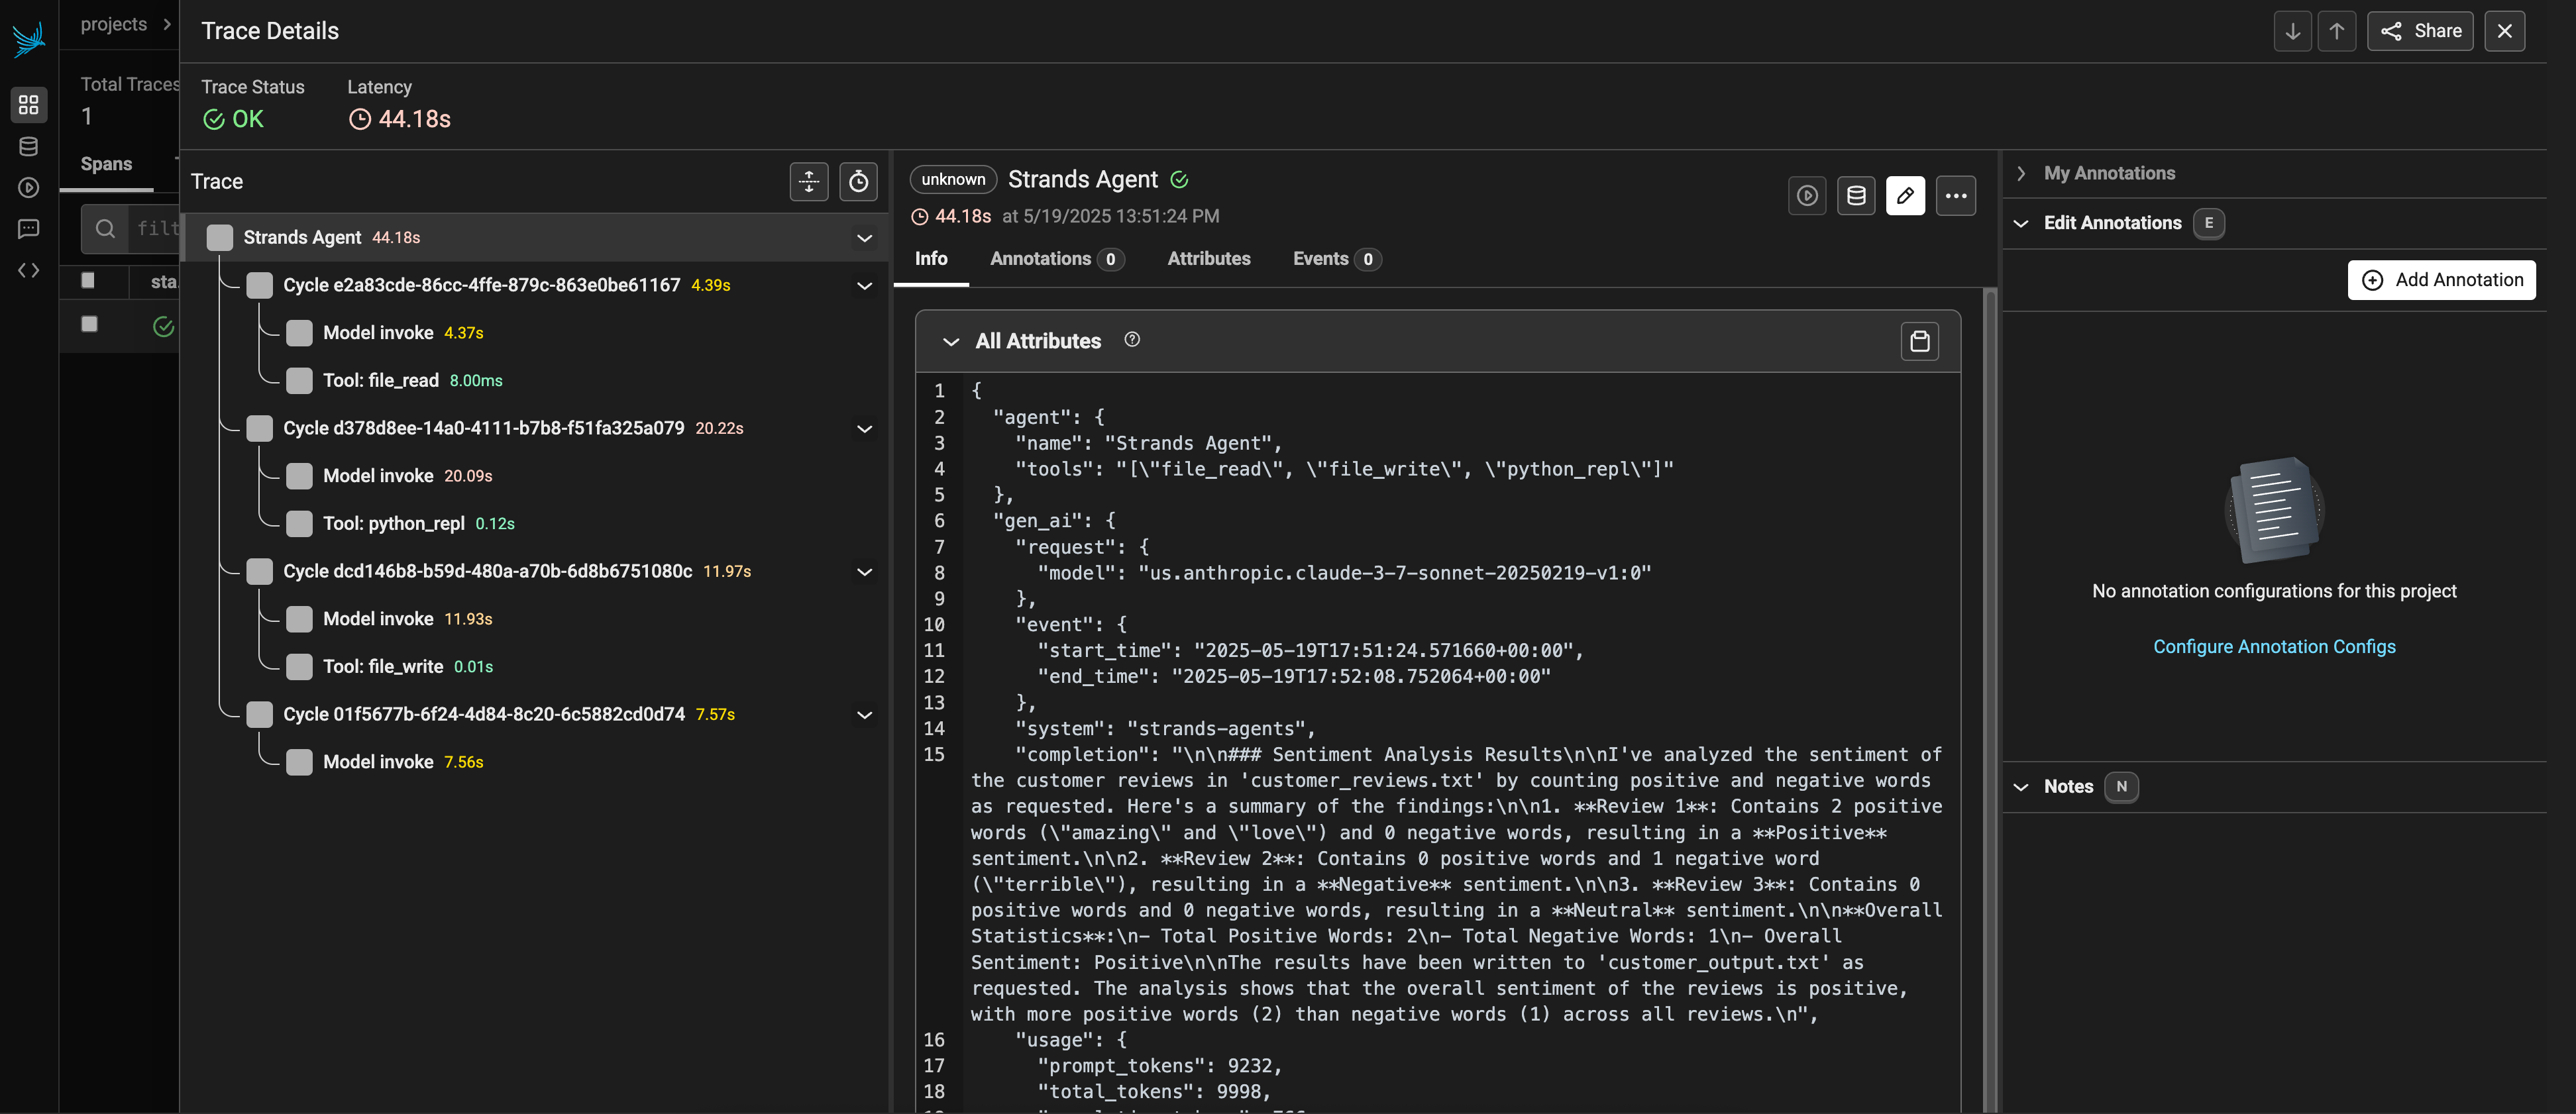

In [ ]:
# cleanup
px.close_app()